#  Importing Libraries and Loading the Dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
games=pd.read_csv('Free PC Games Dataset.csv')

##  First 10 Records of the Games Dataset


In [2]:
games.head(10)

,id,title,description,url,genre,platform,publisher,developer,release_date
0,2,World of Tanks,"If you like blowing up tanks, with a quick and...",https://www.freetogame.com/open/world-of-tanks,Shooter,PC (Windows),Wargaming,Wargaming,12/04/11
1,3,Warframe,A cooperative free-to-play third person online...,https://www.freetogame.com/open/warframe,Shooter,PC (Windows),Digital Extremes,Digital Extremes,25/03/13
2,4,CRSED: F.O.A.D.,Take the battle royale genre and add mystical...,https://www.freetogame.com/open/crsed,Shooter,PC (Windows),Gaijin Distribution KFT,Darkflow Software,12/12/19
3,5,Crossout,A post-apocalyptic MMO vehicle combat game!,https://www.freetogame.com/open/crossout,Shooter,PC (Windows),Targem,Gaijin,30/05/17
4,6,Blade and Soul,A free-to-play martial arts MMORPG that tasks ...,https://www.freetogame.com/open/blade-and-soul,MMORPG,PC (Windows),NCSoft,NCSoft,19/01/16
5,7,Armored Warfare,A modern team-based MMO tank game from Obsidia...,https://www.freetogame.com/open/armored-warfare,Shooter,PC (Windows),My.com (Mail.ru Group),Obsidian Entertainment,08/10/15
6,8,Trove,A free to play Sandbox massively multiplayer o...,https://www.freetogame.com/open/trove,MMORPG,PC (Windows),Trion Worlds,Trion Worlds,09/07/15
7,9,World of Warships,A 3D free to play naval action-themed MMO from...,https://www.freetogame.com/open/world-of-warships,Shooter,PC (Windows),Wargaming,Wargaming,02/07/15
8,10,ArcheAge,"A free-to-play, hybrid fantasy/sandbox MMORPG ...",https://www.freetogame.com/open/archeage,MMORPG,PC (Windows),Kakao Games,XL Games,04/09/14
9,11,Neverwinter,A free-to-play 3D action MMORPG based on the a...,https://www.freetogame.com/open/neverwinter,MMORPG,PC (Windows),Perfect World Entertainment,Cryptic Studios,06/12/13


##  Dataset Structure Overview


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            407 non-null    int64 
 1   title         407 non-null    object
 2   description   407 non-null    object
 3   url           407 non-null    object
 4   genre         407 non-null    object
 5   platform      407 non-null    object
 6   publisher     407 non-null    object
 7   developer     407 non-null    object
 8   release_date  407 non-null    object
dtypes: int64(1), object(8)
memory usage: 28.7+ KB


## Statistics of Dataset


In [4]:
games.describe()

,id
count,407.000000
mean,319.518428
std,180.071849
min,2.000000
25%,183.000000
50%,317.000000
75%,470.000000
max,611.000000


##  Finding and Analyzing Null (Missing) Values


In [5]:
games.isnull().sum()

id              0
title           0
description     0
url             0
genre           0
platform        0
publisher       0
developer       0
release_date    0
dtype: int64

##  Finding Special Characters in the Dataset


In [6]:
games.isin(['-']).sum()

id              0
title           0
description     0
url             0
genre           0
platform        0
publisher       0
developer       0
release_date    0
dtype: int64

## Finding Duplicated Value

In [7]:
games.duplicated().sum()

np.int64(0)

In [8]:
games['id'].duplicated().sum()

np.int64(0)

##  Checking for Special Characters ('-') in String Columns

In [10]:
for col in games.select_dtypes(include='object').columns:
    print(f"{col}: {(games[col].str.contains('-', na=False)).sum()}")

title: 4
description: 271
url: 278
genre: 0
platform: 0
publisher: 8
developer: 6
release_date: 1


#"No data cleaning is required as there are no duplicates, missing values, or unwanted special characters."

# Data Visualization

## Univariate Analysis

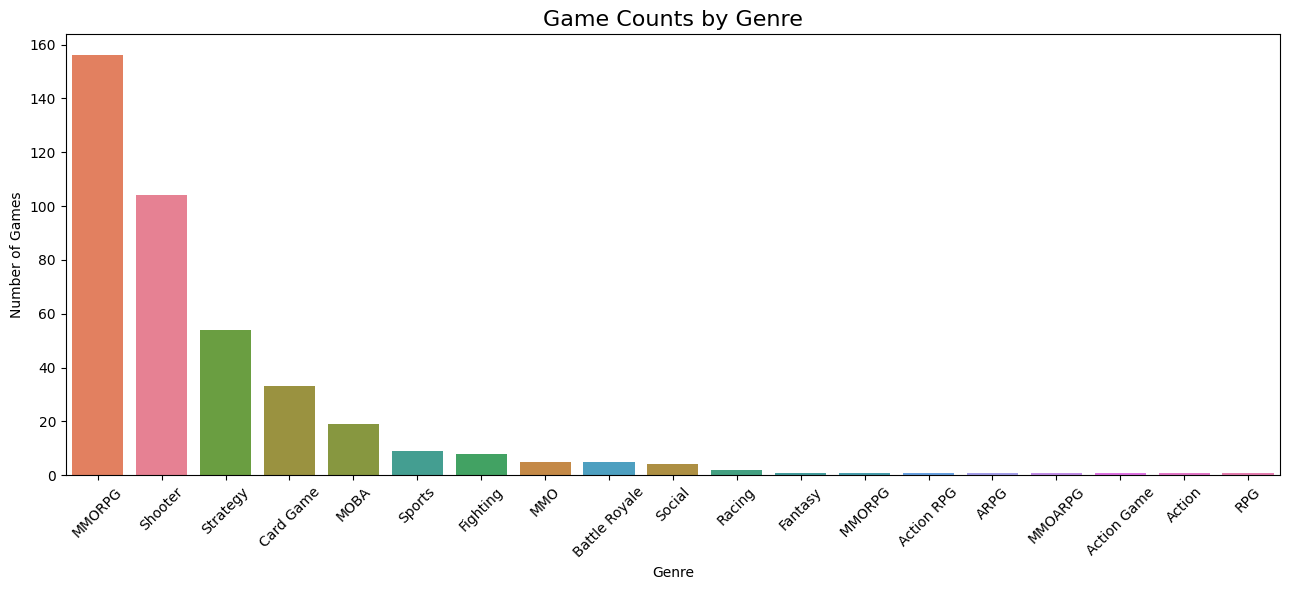

In [35]:
plt.figure(figsize=(13,6))
sns.countplot(x='genre',order=games['genre'].value_counts().index,data=games,hue='genre')
plt.xticks(rotation=45)
plt.title('Game Counts by Genre', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🎮 Genre Popularity Insight

From the above chart, we observe that **MMORPG** is the most dominant genre among games in the dataset, followed by **Shooter** games. In contrast, genres like **RPG**, **Action**, and a few others appear less frequently, indicating relatively lower representation or popularity.

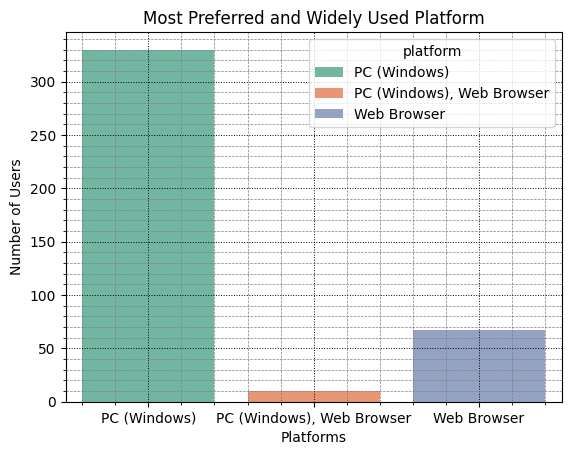

In [12]:
sns.countplot(x='platform',data=games,hue='platform',palette='Set2',legend=True)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',lw=0.7,color='black')
plt.grid(which='minor',linestyle='--',lw=0.5,color='grey')
plt.title('Most Preferred and Widely Used Platform')
plt.xlabel('Platforms')
plt.ylabel('Number of Users')
plt.show()

### 🎮 Most Preferred and Widely Used Platforms

From the above chart, we observe that the **PC (Windows)** platform is the most commonly used and preferred by gamers. Following that, the **Web** platform ranks second in usage. 

This indicates that game developers focusing on the Windows platform have a higher chance of reaching a larger audience, increasing the potential for both **profitability** and **successful game delivery**.

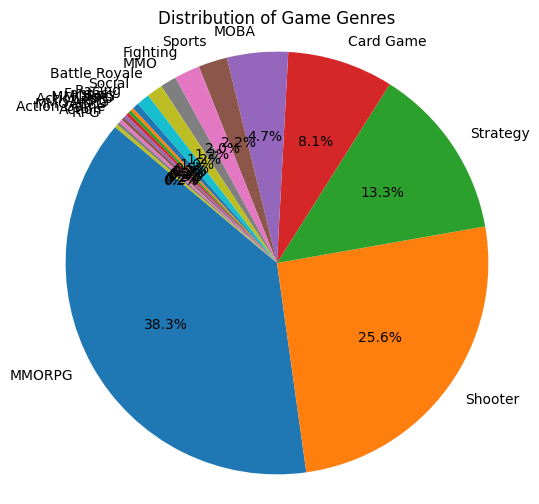

In [23]:
plt.figure(figsize=(6,6))
genre=games['genre'].value_counts()
plt.pie(genre, labels=genre.index, autopct='%.1f%%', startangle=140)
plt.title('Distribution of Game Genres')
plt.axis('equal') 
plt.show()

#The pie chart shows the percentage distribution of game genres, highlighting the most and least represented categories in the dataset.

## Bivariative analysis

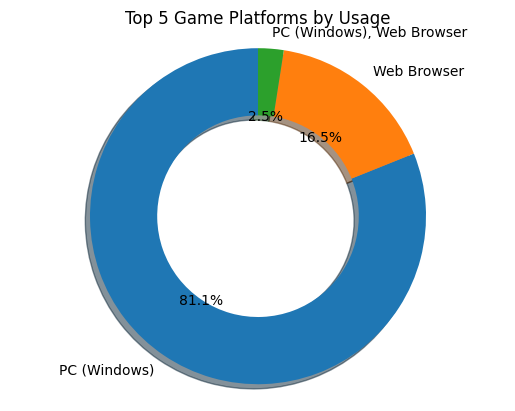

In [47]:
platform_counts = games['platform'].value_counts()
top_platforms = platform_counts.head(5)
plt.pie(top_platforms, labels=top_platforms.index, autopct='%.1f%%', startangle=90, wedgeprops={'width':0.4},shadow=True)
plt.title('Top 5 Game Platforms by Usage')
plt.axis('equal')
plt.show()

#This chart represents the distribution of the top 5 most used gaming platforms, highlighting which platforms dominate in terms of game availability or usage share.

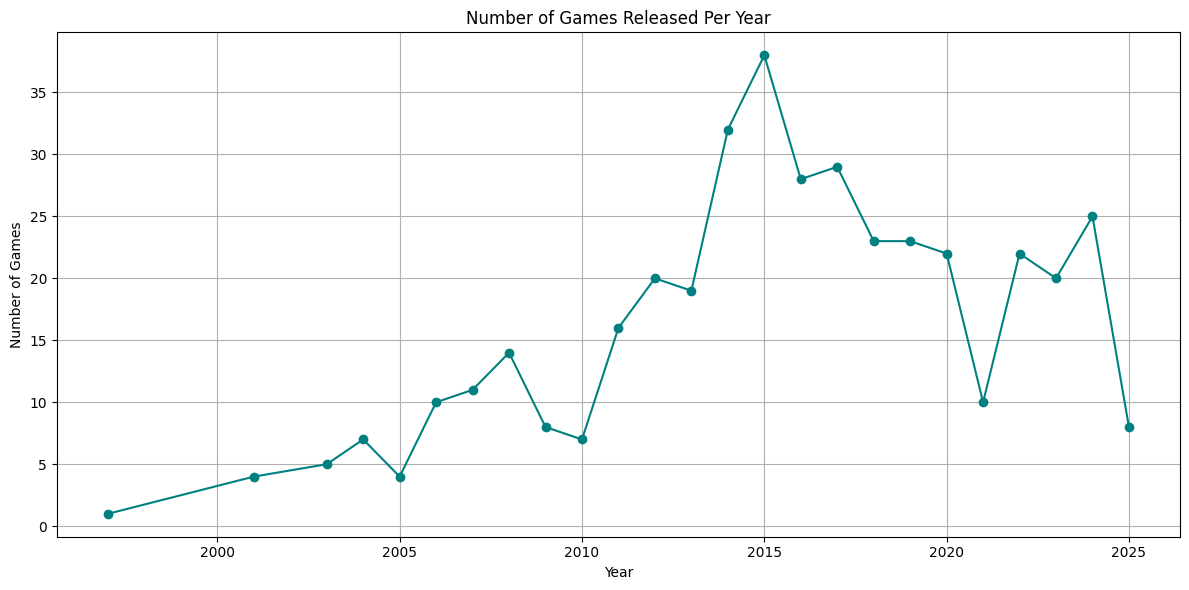

In [58]:
games['release_date'] = pd.to_datetime(games['release_date'], errors='coerce')
games = games.dropna(subset=['release_date'])
games['year'] = games['release_date'].dt.year
games_per_year = games['year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.plot(games_per_year.index, games_per_year.values, marker='o', linestyle='-', color='teal')
plt.title('Number of Games Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.tight_layout()
plt.show()

#The gaming industry saw significant growth in 2015, followed by a sharp decline during the COVID-19 period and again in 2025. However, the industry remains highly promising, and investors can confidently explore opportunities in emerging platforms such as VR, AR, cloud gaming, and mobile-based games.

# Final Analysis:
#Analyzed trends in the gaming industry and identified peak growth in 2019 and decline during the 2021 COVID-19 period; concluded PC (Windows) as the most preferred platform and highlighted future investment potential in emerging gaming technologies like VR.

#Final Analysis:
#The gaming industry witnessed strong growth in 2019.
#A significant decline was observed in 2021, mainly due to the COVID-19 pandemic.
#Most gamers today prefer PC (Windows) platforms for gaming.
#Despite recent setbacks, the future of the gaming industry looks promising, especially in areas like:
#VR (Virtual Reality)
#Cloud Gaming
#Mobile Platforms